Fifa World Cup

In [280]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [281]:
df = pd.read_csv("WorldCupMatches.csv")

In [282]:
df["Total Goals"] = df["Home Team Goals"] + df["Away Team Goals"]

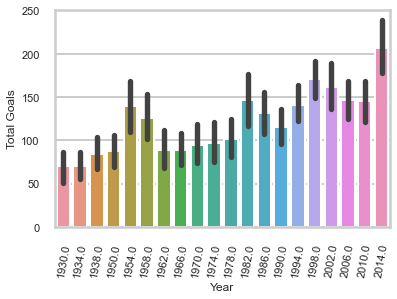

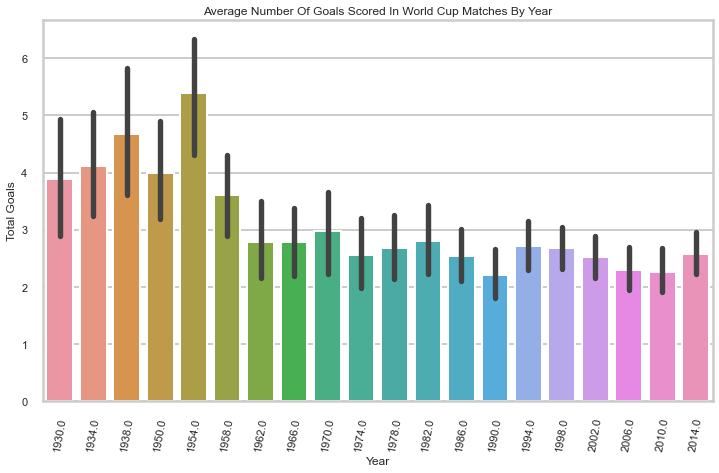

In [283]:
goal_list = []

years = df.Year.dropna()
years = years.unique()

for year in years:
    goals = df[df.Year == year]["Total Goals"]
    goals = np.sum(goals)
    goal_list.append(goals)

plt.clf()
ax = plt.subplot()
plt.bar(years, goal_list)
ax.set_xticks(years)
ax.set_xticklabels(years)
plt.xticks(rotation = 80)
# plt.show()

plt.clf()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 0.5)
sns.despine(bottom = True)
sns.barplot(data = df, x = "Year", y = "Total Goals", estimator = sum)
plt.xticks(rotation = 80)
plt.show()



f, ax = plt.subplots(figsize = (12, 7))
ax = sns.barplot(data = df, x = "Year", y = "Total Goals")
plt.xticks(rotation = 80)
ax.set_title("Average Number Of Goals Scored In World Cup Matches By Year")
plt.show()

In [284]:
df_goals = df[["Home Team Goals", "Year"]]
home_list = ["home" for i in range(len(df_goals.Year))]
df_goals["home/away"] = home_list
df_goals = df_goals[["Home Team Goals", "home/away", "Year"]]
df_goals.columns = [["goals", "home/away", "year"]]

C:\Users\JUANME~1\AppData\Local\Temp/ipykernel_13376/1510421253.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goals["home/away"] = home_list


<Figure size 432x288 with 0 Axes>

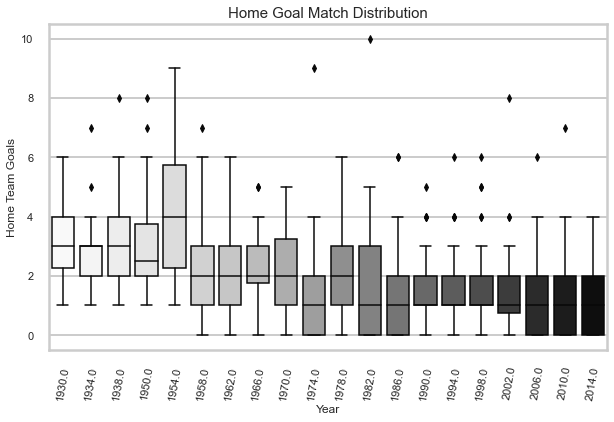

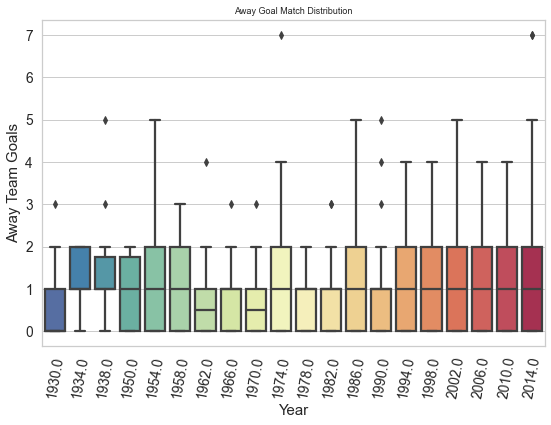

In [285]:
plt.clf()
f, ax = plt.subplots(figsize = (10, 6))
sns.set_context("notebook", font_scale = 1.25)
ax = sns.boxplot(data = df, x = "Year", y = "Home Team Goals", palette = "Greys")
plt.xticks(rotation = 80)
plt.title("Home Goal Match Distribution")
plt.show()

f1, ax2 = plt.subplots(figsize = (9, 6))
sns.set_context("talk", font_scale = 0.5)
ax2 = sns.boxplot(data = df, x = "Year", y = "Away Team Goals", palette = "Spectral_r")
plt.title("Away Goal Match Distribution")
plt.xticks(rotation = 80)
plt.show()

In [286]:
df_final = df[df.Stage == "Final"].reset_index(drop = True)

winner_list = []

def winner(x):
    if  x["Home Team Goals"] > x["Away Team Goals"]:
        winner_list.append(x["Home Team Name"])
    
    elif x["Home Team Goals"] < x["Away Team Goals"]: 
        winner_list.append(x["Away Team Name"])

    elif x["Home Team Goals"] == x["Away Team Goals"]:
        if x["Home Team Name"] in x["Win conditions"]:
            winner_list.append(x["Home Team Name"])

        elif x["Away Team Name"] in x["Win conditions"]:
            winner_list.append(x["Awaye Team Name"])

    return winner_list


winner = df_final.apply(winner, axis = 1)[0]
# winner = winner[0]

df_final["Winner"] = winner
df_final["Titles"] = 1

<Figure size 432x288 with 0 Axes>

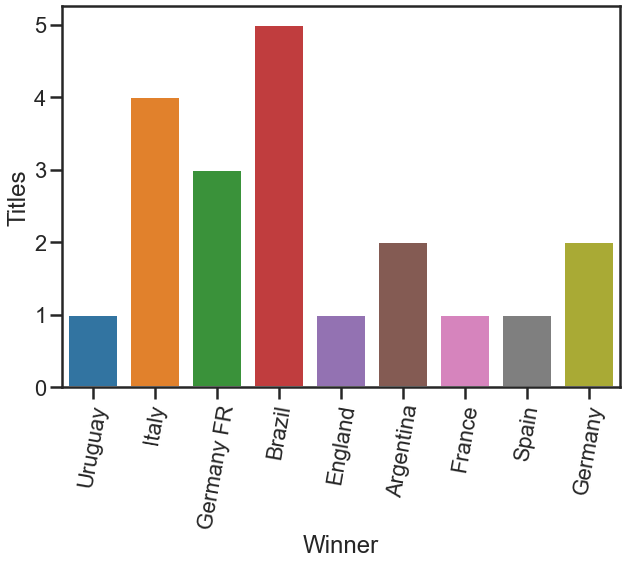

In [292]:
plt.clf()
f, ax = plt.subplots(figsize = (10, 7))
sns.set_context("poster")
sns.set_style("ticks")
plt.xticks(rotation = 80)
sns.barplot(data = df_final, x = "Winner", y = "Titles", estimator = sum, palette = "tab10")
plt.show()